In [158]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In this notebook, we are going to load <b>BOSTON HOUSING PRICE</b> dataset which has already been integrated into sklearn.datasets

In [159]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [160]:
#Check for what Boston data contains
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [161]:
boston_data['feature_names'].shape

(13,)

In [162]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [163]:
#put all features + label into a dataframe structure for visibility
df = pd.DataFrame(np.concatenate(
    [boston_data['data'], boston_data['target'].reshape(-1, 1)], axis=1),
             columns=[boston_data['feature_names'].tolist() + ['Y']])
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [174]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Wrangling

In [164]:
df.info() # we got no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     506 non-null    float64
 1   (ZN,)       506 non-null    float64
 2   (INDUS,)    506 non-null    float64
 3   (CHAS,)     506 non-null    float64
 4   (NOX,)      506 non-null    float64
 5   (RM,)       506 non-null    float64
 6   (AGE,)      506 non-null    float64
 7   (DIS,)      506 non-null    float64
 8   (RAD,)      506 non-null    float64
 9   (TAX,)      506 non-null    float64
 10  (PTRATIO,)  506 non-null    float64
 11  (B,)        506 non-null    float64
 12  (LSTAT,)    506 non-null    float64
 13  (Y,)        506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [172]:
print("Number of duplicates:%d"%df.duplicated().sum()) # we got no duplicate in the dataset

Number of duplicates:0


In [175]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Exploratory Data Analysis

In [178]:
df.columns.to_list()[-1]

('Y',)

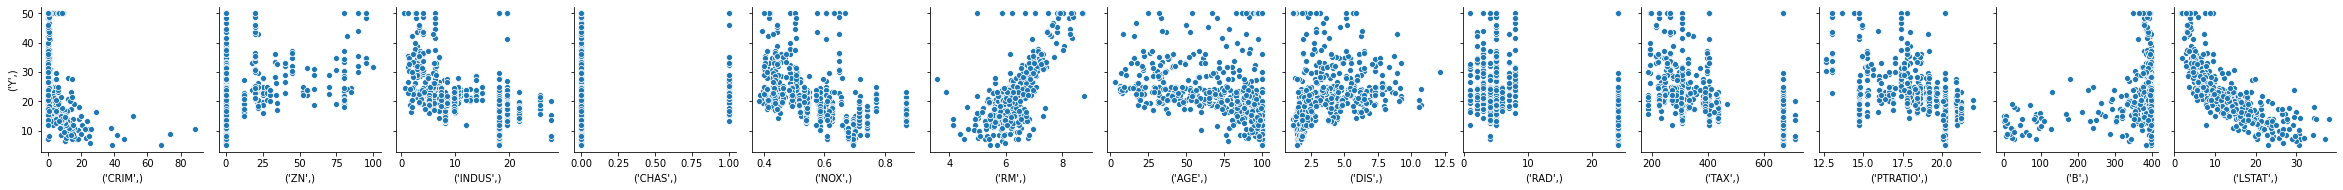

In [179]:
#we visualize the pairwise corrleation of the dataset through pairplot - for linearization + normization
sns.pairplot(df, x_vars=df.columns.to_list()[:-1], y_vars=[df.columns.to_list()[-1]])

Only the feature <b>RM & LSTAT</b> can be a little obviously seen having postive and negative correlation respectively with label Y

Next we gonna use heatmap from Seaborn for pairwise correlation.

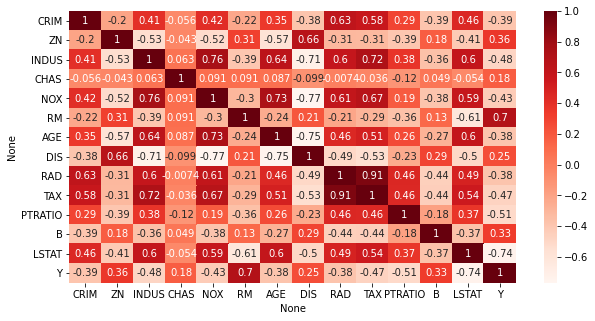

In [192]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

In [201]:
#set a threshold for the correlation of the features with label
df.loc[:, df.corr().iloc[:, -1].abs() > 0.7]

,LSTAT,Y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [218]:
df.columns #need renaming its column names

MultiIndex([(   'CRIM',),
            (     'ZN',),
            (  'INDUS',),
            (   'CHAS',),
            (    'NOX',),
            (     'RM',),
            (    'AGE',),
            (    'DIS',),
            (    'RAD',),
            (    'TAX',),
            ('PTRATIO',),
            (      'B',),
            (  'LSTAT',),
            (      'Y',)],
           )

In [224]:
df.columns=list((map(lambda x: x[0], df.columns.to_list())))

In [292]:
#see the feature with correlation against price greater than 0.6
df.loc[:, df.corr().iloc[:, -1].abs() > 0.7]

,LSTAT,Y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [293]:
df.corr().iloc[:, -1].abs()

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
Y          1.000000
Name: Y, dtype: float64

In [319]:
#list of qualified features' names 
chosen_features = list(filter(lambda x: x!='Y', df.loc[:, (df.corr().iloc[:, -1].abs() > 0.6)].columns.to_list()))
#target for y labels
target = df['Y']

In [320]:
chosen_features

['RM', 'LSTAT']

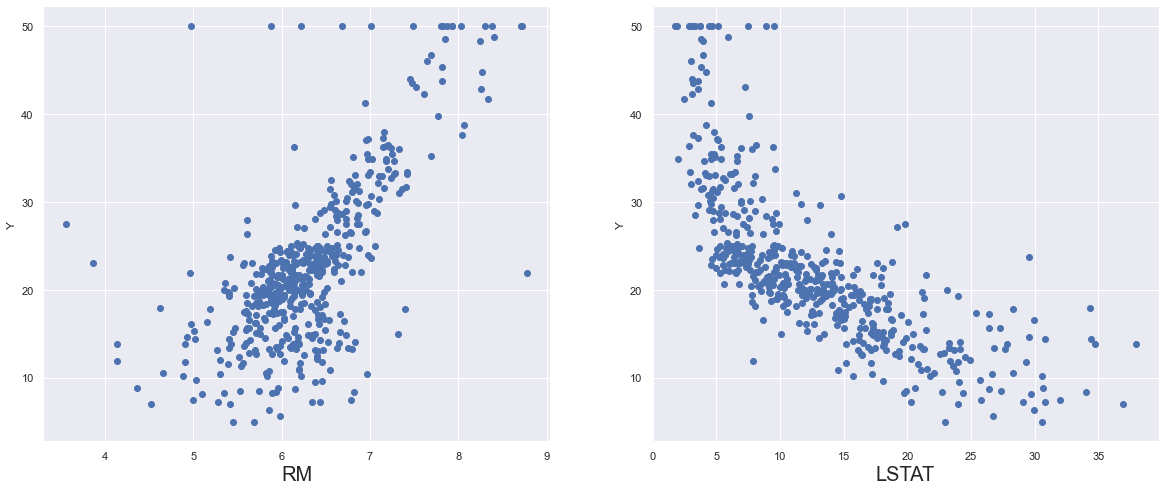

In [321]:
sns.set()
fig = plt.figure(figsize=(20, 8))
for i, col in enumerate(chosen_features):
    ax = fig.add_subplot(1, len(chosen_features), i + 1)
    ax.plot(df[chosen_features[i]], target, 'bo')
    ax.set_xlabel(chosen_features[i], fontsize=20)
    ax.set_ylabel('Y')
